Install Dependencies

In [ ]:
!pip install -U ultralytics roboflow
!pip install -U matplotlib pillow opencv-python-headless

  Using cached opencv_python_headless-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached opencv_python_headless-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (49.9 MB)
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Using cached opencv_python_headless-4.12.0.88-cp37-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (19 kB)
Using cached opencv_python_headless-4.12.0.88-cp37-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (54.0 MB)
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.10.0.84
    Uninstalling opencv-python-headless-4.10.0.84:
      Successfully uninstalled opencv-python-headless-4.10.0.84
ERROR: pip's dependency resolver does not currently take into account all 

Mount Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Unzip the dataset

In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/M4/Capstone 4/Calory.v1i.yolov12.zip" -d /content/dataset

Archive:  /content/drive/MyDrive/Colab Notebooks/M4/Capstone 4/Calory.v1i.yolov12.zip
  inflating: /content/dataset/README.dataset.txt  
  inflating: /content/dataset/README.roboflow.txt  
  inflating: /content/dataset/data.yaml  
   creating: /content/dataset/test/
   creating: /content/dataset/test/images/
 extracting: /content/dataset/test/images/1374953_jpg.rf.8780beea257937e86e1f9b689fd32964.jpg  
 extracting: /content/dataset/test/images/1380765_jpg.rf.f2ecf9bb6cd6989872aef51a81060bd5.jpg  
 extracting: /content/dataset/test/images/1640730_jpg.rf.5ec16c880f17774c88bf9e593f824944.jpg  
 extracting: /content/dataset/test/images/1652710_jpg.rf.b2c421a8847ae95ca183193fd24ec650.jpg  
 extracting: /content/dataset/test/images/1675150_jpg.rf.51a989ad07c328afe9d7a2aceb1f3d9e.jpg  
 extracting: /content/dataset/test/images/1699065_jpg.rf.0c0ba2878b2decbe522d64e18eeb0265.jpg  
 extracting: /content/dataset/test/images/2158248_jpg.rf.a7f7051152a886f107f7596b3c184e64.jpg  
 extracting: /cont

In [ ]:
!cat /content/dataset/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 13
names: ['Ayam Goreng -260 kal per 100 gr-', 'Capcay -67 kal per 100gr-', 'Nasi -129 kal per 100gr-', 'Sayur bayam -36 kal per 100gr-', 'Sayur kangkung -98 kal per 100gr-', 'Sayur sop -22 kal per 100gr-', 'Tahu -80 kal per 100 gr-', 'Telur Dadar -93 kal per 100gr-', 'Telur Mata Sapi -110kal1butir-', 'Telur Rebus -78kal 1butir-', 'Tempe -225 kal per 100 gr-', 'Tumis buncis -65 kal per 100gr-', 'food-z7P4']

roboflow:
  workspace: ayu-asipq
  project: calory
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/ayu-asipq/calory/dataset/1

Verify data yaml

In [ ]:
import yaml

yaml_path = '/content/dataset/data.yaml'

with open(yaml_path, 'r') as f:
    data = yaml.safe_load(f)

# Fix the paths to absolute (if they start with '../')
for key in ['train', 'val', 'test']:
    if key in data and data[key].startswith('..'):
        folder = key if key != 'val' else 'valid'
        data[key] = f'/content/dataset/{folder}/images'

# Save new file as food.yaml
with open('food.yaml', 'w') as f:
    yaml.dump(data, f)

!cat food.yaml


names:
- Ayam Goreng -260 kal per 100 gr-
- Capcay -67 kal per 100gr-
- Nasi -129 kal per 100gr-
- Sayur bayam -36 kal per 100gr-
- Sayur kangkung -98 kal per 100gr-
- Sayur sop -22 kal per 100gr-
- Tahu -80 kal per 100 gr-
- Telur Dadar -93 kal per 100gr-
- Telur Mata Sapi -110kal1butir-
- Telur Rebus -78kal 1butir-
- Tempe -225 kal per 100 gr-
- Tumis buncis -65 kal per 100gr-
- food-z7P4
nc: 13
roboflow:
  license: CC BY 4.0
  project: calory
  url: https://universe.roboflow.com/ayu-asipq/calory/dataset/1
  version: 1
  workspace: ayu-asipq
test: /content/dataset/test/images
train: /content/dataset/train/images
val: /content/dataset/valid/images


Training the model

In [ ]:
# Train with YOLOv12m
from ultralytics import YOLO

model = YOLO("yolo12m.pt")  # medium model of YOLOv12

model.train(
    data='food.yaml',
    epochs=80,
    imgsz=640,
    batch=8,
    name='food_yolo12m'
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=food.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=80, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 1,  4,  6,  7,  8,  9, 10, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dae06b1a4b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0

In [ ]:
metrics = model.val(data='food.yaml', split='test')
print(metrics)

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12m summary (fused): 169 layers, 20,114,935 parameters, 0 gradients, 67.2 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 9.5±2.8 MB/s, size: 40.1 KB)
val: Scanning /content/dataset/test/labels... 106 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 106/106 677.3it/s 0.2s
val: New cache created: /content/dataset/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 7/7 1.5it/s 4.5s
                   all        106        126      0.798      0.881      0.878      0.646
Capcay -67 kal per 100gr-          6          6      0.906          1      0.995      0.872
Sayur kangkung -98 kal per 100gr-         10         10      0.785          1      0.995      0.735
Tahu -80 kal per 100 gr-          2          3          1      0.942      0.995      0.653
Telur Dadar -93 kal per 100gr-         50         52      0.879      0.

Save best weight of model

In [ ]:
# After training, save best weights to Drive
!cp /content/runs/detect/food_yolo12m/weights/best.pt "/content/drive/MyDrive/Colab Notebooks/M4/Capstone 4/best_food_yolo12m.pt"

View the result

In [ ]:
from ultralytics import YOLO
from PIL import Image
import glob
import IPython.display as display

# Load your trained model
model = YOLO("/content/runs/detect/food_yolo12m/weights/best.pt")

# Run prediction on validation images (you can also use /content/dataset/test/images)
results = model.predict(
    source="/content/dataset/valid/images",
    conf=0.5,
    save=True,
    max_det=5
)

# Show 5 random predicted images
predicted_images = glob.glob("runs/detect/predict*/**/*.jpg", recursive=True)[:5]
for path in predicted_images:
    display.display(Image.open(path))


Output hidden; open in https://colab.research.google.com to view.

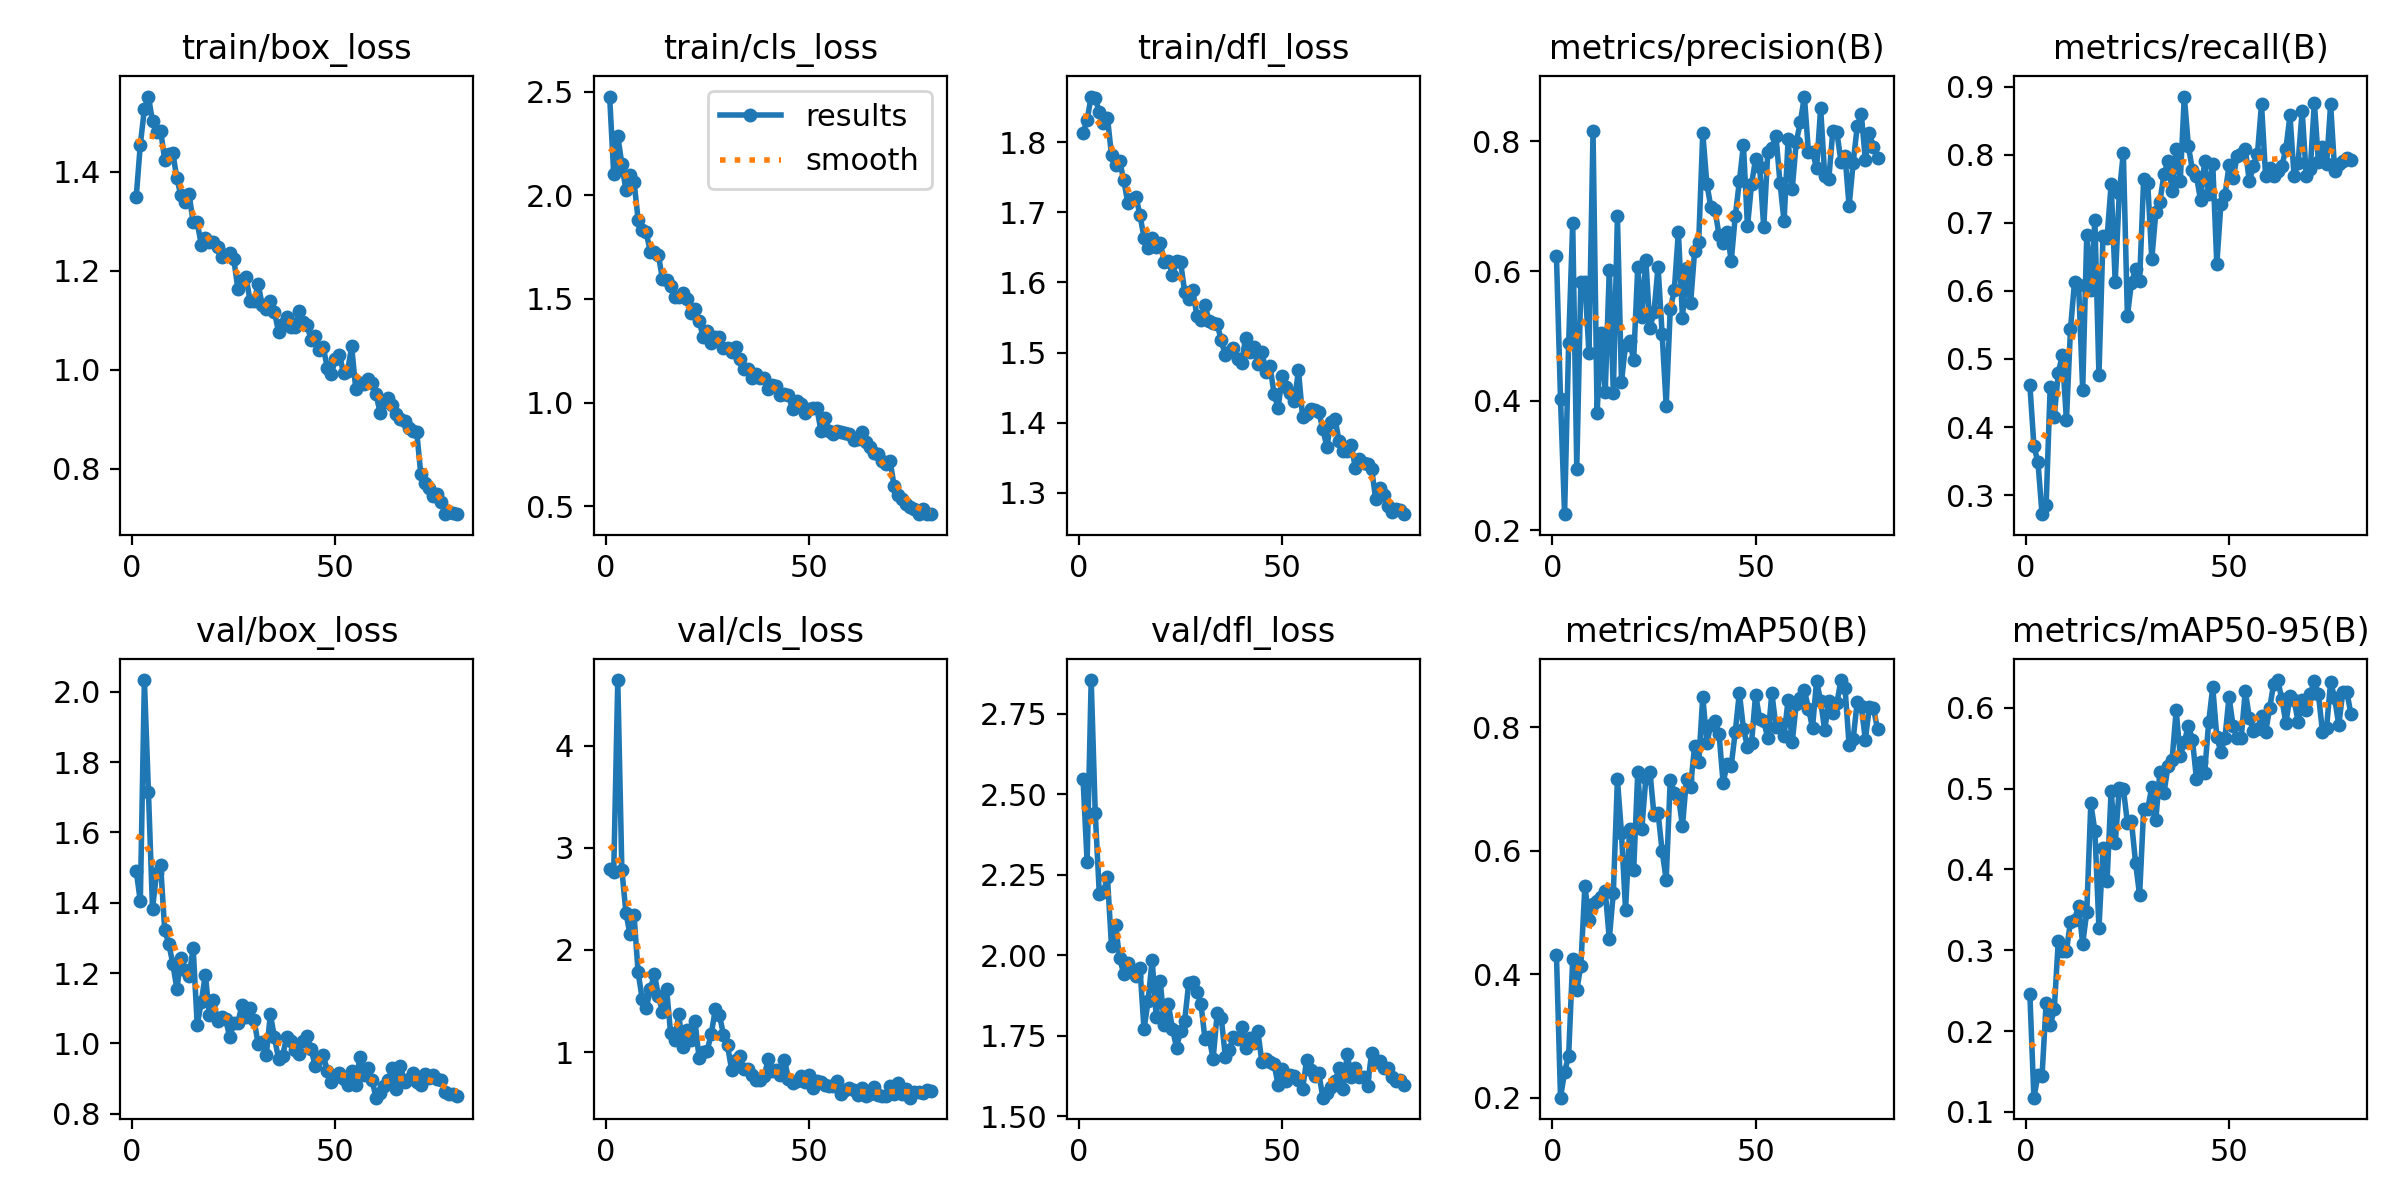

In [ ]:
from IPython.display import Image, display
import glob

# Find latest YOLO results.png automatically
results_img = sorted(glob.glob("/content/runs/detect/*/results.png"))[-1]
display(Image(filename=results_img))


In [ ]:
import os, glob

# Path to labels
train_labels = glob.glob('/content/dataset/train/labels/*.txt')
val_labels = glob.glob('/content/dataset/valid/labels/*.txt')

def check_class_presence(label_paths, class_id):
    count = 0
    for path in label_paths:
        with open(path) as f:
            for line in f:
                if line.startswith(str(class_id) + " "):
                    count += 1
    return count

# find class index for 'food-z7P4' from your yaml
import yaml
yaml_path = '/content/dataset/data.yaml'
with open(yaml_path) as f:
    names = yaml.safe_load(f)['names']

print("Class mapping:", names)
food_idx = list(names.keys())[list(names.values()).index('food-z7P4')]
print(f"Checking class index {food_idx} ({names[food_idx]})...")

train_count = check_class_presence(train_labels, food_idx)
val_count = check_class_presence(val_labels, food_idx)
print(f"Train instances: {train_count}, Validation instances: {val_count}")


Class mapping: ['Ayam Goreng -260 kal per 100 gr-', 'Capcay -67 kal per 100gr-', 'Nasi -129 kal per 100gr-', 'Sayur bayam -36 kal per 100gr-', 'Sayur kangkung -98 kal per 100gr-', 'Sayur sop -22 kal per 100gr-', 'Tahu -80 kal per 100 gr-', 'Telur Dadar -93 kal per 100gr-', 'Telur Mata Sapi -110kal1butir-', 'Telur Rebus -78kal 1butir-', 'Tempe -225 kal per 100 gr-', 'Tumis buncis -65 kal per 100gr-', 'food-z7P4']


AttributeError: 'list' object has no attribute 'keys'